In [7]:
%matplotlib inline
import numpy as np
import lsst.sims.utils as utils
import healpy as hp
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u
from astropy.time import Time

In [8]:
# Create a simple map of ones
nside = 256
ra, dec = utils.hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))
coord = SkyCoord(ra=ra*u.rad,dec=dec*u.rad)
g_long, g_lat = coord.galactic.l.radian, coord.galactic.b.radian #utils._galacticFromEquatorial(ra,dec)
eclip_long, eclip_lat = coord.barycentrictrueecliptic.lon.radian, coord.barycentrictrueecliptic.lat.radian

In [9]:
galactic_lat_max = 10.
main_dec = 0
main_weight = 1.

south_dec = -60
south_weight = 0.4

nes_dec = 0.
nes_eclip = 15.
nes_weight = 0.5

gal_lat = 10.
gal_long_end1 = 70.
gal_long_end2 = 270.
gal_weight = 0.2

In [10]:
regionMap = np.zeros(hp.nside2npix(nside))+hp.UNSEEN
# Set everything below dec <= 0 to be one
regionMap[np.where(dec <= np.radians(main_dec))] = main_weight
# Set the South Region 
regionMap[np.where(dec < np.radians(south_dec))] = south_weight
# Set the NES
regionMap[np.where((dec > np.radians(nes_dec)) & (eclip_lat < np.radians(nes_eclip)))] = nes_weight
# Set the Galactic Plane
regionMap[np.where( (np.abs(g_lat) < np.radians(gal_lat)) & (g_long < np.radians(gal_long_end1)) )] = gal_weight
regionMap[np.where( (np.abs(g_lat) < np.radians(gal_lat)) & (g_long > np.radians(gal_long_end2)) )] = gal_weight

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


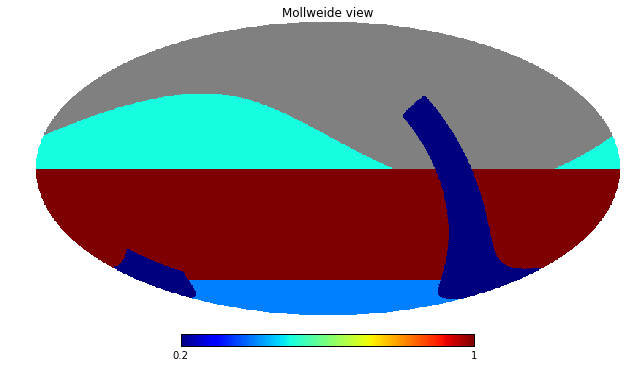

In [11]:
hp.mollview(regionMap)

In [12]:
regionMap.size

786432

In [14]:
# try making an alt,az map.
site =utils.Site('LSST')
lsst_location = EarthLocation(lat=site.latitude*u.deg, lon=site.longitude*u.deg, height=site.height*u.m)
time = Time(57000, format='mjd')
altaz = coord.transform_to(AltAz(obstime=time, location=lsst_location))

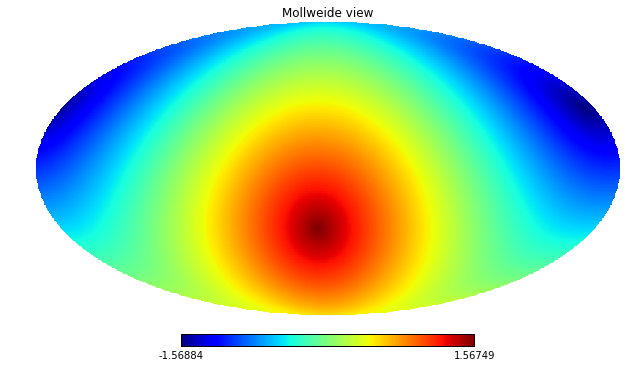

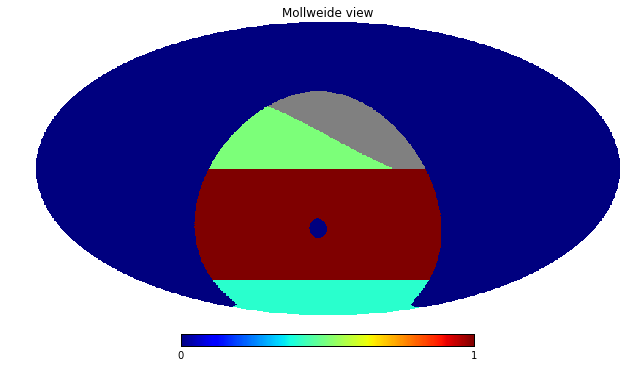

In [20]:
alt = altaz.alt.radian
hp.mollview(alt)

mask = alt*0+1
mask[np.where(alt > np.radians(90.-5))] = 0
mask[np.where(alt < np.radians(20.))] = 0
hp.mollview(regionMap*mask)
